# CE-40717: Machine Learning

## HW6-Gradient Boosting

### Installation:
You can use [sklearn](https://scikit-learn.org) and [xgboost](https://xgboost.readthedocs.io) packages:
```python
!pip install -U scikit-learn
!pip install xgboost
```

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb

from time import time
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, plot_confusion_matrix, confusion_matrix

### Load & Prepare Dataset:

In [20]:
np.random.seed(seed=42)

# load dataset:
iris = datasets.load_iris()
X = iris.data
y = iris.target


# preprocess(if you need):


# split dataset to train set and validation set:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.1)

data_train = xgb.DMatrix(data=x_train, label=y_train)
data_val = xgb.DMatrix(data=x_val,label=y_val)

n_val = 10
class_names = iris.target_names
print(n_val, class_names)

10 ['setosa' 'versicolor' 'virginica']


### Set Hyperparameter for Both Gradine Boost & XGboost:

In [21]:
# Gradine Boost:
GB_param = dict(n_estimators=5,
                learning_rate=0.01,
                max_depth=3,
                random_state=0)

# XGboost:
XGboost_param = {"eta": 0.3,
                 "silent": True,
                 "objective": "multi:softprob",
                 "num_class": 3,
                 "max_depth": 3}

num_round = 5

### Define Classifiers:

In [31]:
# define classifier for gradient boost:
GB_clf = GradientBoostingClassifier(n_estimators=5,
                learning_rate=0.01,
                max_depth=3,
                random_state=0)



# define classifier for XGboost:
XGboost_clf = xgb.XGBClassifier(eta= 0.3,
                 silent=True,
                 objective="multi:softprob",
                 num_class =3,
                 max_depth= 3)

### Train Both Classifiers:

In [33]:
# train  gradient boost:
tic = time()
trained_GB = GB_clf.fit(x_train,y_train)
toc = time()

# calculate training time for GB:
GB_train_time = toc - tic
print(f"GB_train_time: {1000.0*GB_train_time} millisecond")


# train XGboost:
tic = time()
trained_XGboost =XGboost_clf.fit(x_train,y_train)
toc = time()

# calculate training time for XGboost:
XGboost_train_time = toc - tic
print(f"XGboost_train_time: {1000.0*XGboost_train_time} millisecond")

GB_train_time: 18.610239028930664 millisecond
[21:39:27] WARNING: ..\src\learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:39:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGboost_train_time: 121.13189697265625 millisecond


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


### Prediction on Validation Set:

In [34]:
# prediction for gradient boost:
tic = time()
y_pred_GB = GB_clf.predict(x_val)
toc = time()

# calculate validation time per data for GB:
GB_val_time_per_data = (toc - tic)/len(x_val) 
print(f"GB_val_time_per_data: {1000.0*GB_val_time_per_data} millisecond")


# prediction for XGboost:
tic = time()
y_pred_XGboost = XGboost_clf.predict(x_val)
toc = time()


# calculate validation time per data for XGboost:
XGboost_val_time_per_data = (toc-tic)/len(x_val)
print(f"XGboost_val_time_per_data: {1000.0*XGboost_val_time_per_data} millisecond")

GB_val_time_per_data: 0.06664594014485678 millisecond
XGboost_val_time_per_data: 0.2173900604248047 millisecond


### Evaluation (precision - recall - F1 score - confusion matrix):

#### for Gradient Boost:

In [39]:
# calculate precision
precision_GB = precision_score(y_val,y_pred_GB,average='weighted')

print(f"precision_GB: {precision_GB}")

precision_GB: 1.0


In [41]:
# calculate recall
recall_GB = recall_score(y_val,y_pred_GB,average='weighted')

print(f"recall_GB: {recall_GB}")

recall_GB: 1.0


In [42]:
# calculate F1 score
f1_GB = f1_score(y_val,y_pred_GB,average='weighted')

print(f"F1_GB: {f1_GB}")

F1_GB: 1.0


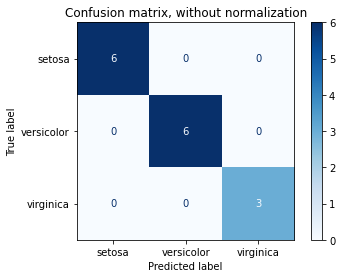

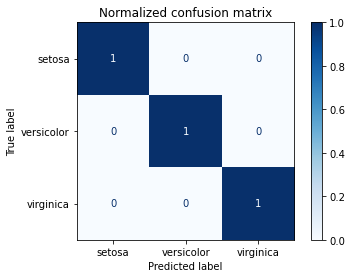

In [51]:
# calculate confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", "true")]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(XGboost_clf, x_val, y_val,
                                 display_labels=iris.target_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

plt.show()

#### for XGboost:

In [44]:
# calculate precision
precision_XGboost = precision_score(y_val,y_pred_XGboost,average='weighted')

print(f"precision_XGboost: {precision_XGboost}")

precision_XGboost: 1.0


In [47]:
# calculate recall
recall_XGboost = recall_score(y_val,y_pred_XGboost,average='weighted')

print(f"recall_XGboost: {recall_XGboost}")

recall_XGboost: 1.0


In [48]:
# calculate F1 score
f1_XGboost = f1_score(y_val,y_pred_XGboost,average='weighted')

print(f"F1_XGboost: {f1_XGboost}")

F1_XGboost: 1.0


In [54]:
# calculate confusion matrix
cm_XGboost = confusion_matrix(y_val,y_pred_XGboost)

print(f"conf_mat_XGboost: {cm_XGboost}")

conf_mat_XGboost: [[6 0 0]
 [0 6 0]
 [0 0 3]]


### Compare Gradient Boost & XGboost Algorithm According to Evaluation Part Results:

Write your analysis here:


I expected for XGBoost to be better at this task but both of them performed equally well. 